<a href="https://colab.research.google.com/github/WilliamChokbengboune/Customer_Clustering_Assignment/blob/main/CustomerClusteringAssignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This box is meant to import the kaggledata and then display the head.

In [5]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

dataset_filename = "Mall_Customers.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "vjchoudhary7/customer-segmentation-tutorial-in-python",
  dataset_filename,
  pandas_kwargs={"usecols":["Annual Income (k$)","Spending Score (1-100)"]}
)

df.head()

Using Colab cache for faster access to the 'customer-segmentation-tutorial-in-python' dataset.


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


The next box is meant to read the csv in the virtual machine of the content page and clean the file.

In [9]:
import numpy as np
import pandas as pd

customer_data = pd.read_csv('../content/Mall_Customers.csv').drop(['CustomerID','Gender','Age'],axis=1)

customer_data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


The data is to be displayed via scatterplot to see efffectiveness.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

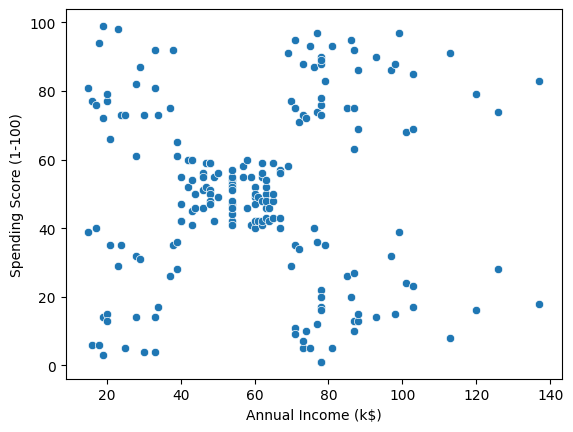

In [11]:
import seaborn as sns
from seaborn import scatterplot
import matplotlib.pyplot as plt

sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)')


This next cell will make the training and testing split and normalize it. The data has to be normalized because the distance of the values from one another are too large.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x_train, x_test, y_train, y_test = train_test_split(customer_data[['Annual Income (k$)']], customer_data['Spending Score (1-100)'], test_size=0.2, random_state=42)

x_train_normalized = preprocessing.normalize(x_train)
x_test_normalized = preprocessing.normalize(x_test)

The first visualization will be when the k is 3.

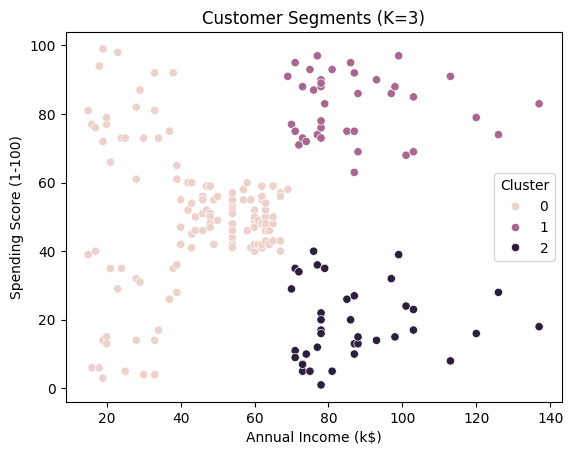

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

X_clustering = customer_data[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto').fit(X_scaled)

customer_data_with_labels = customer_data.copy()
customer_data_with_labels['Cluster'] = kmeans.labels_

sns.scatterplot(data=customer_data_with_labels, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.title('Customer Segments (K=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

The next cell will show when the k is 4

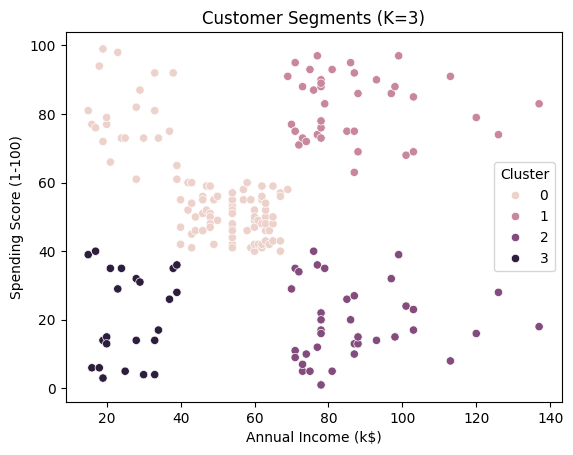

In [21]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto').fit(X_scaled)

customer_data_with_labels['Cluster'] = kmeans.labels_

sns.scatterplot(data=customer_data_with_labels, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.title('Customer Segments (K=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

The next cell is for when k is 5.

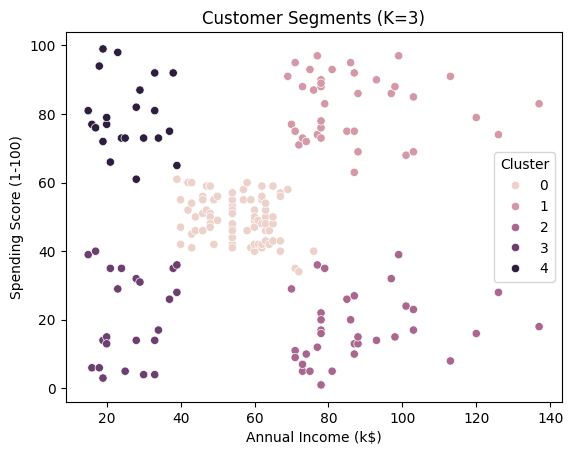

In [22]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto').fit(X_scaled)

customer_data_with_labels['Cluster'] = kmeans.labels_

sns.scatterplot(data=customer_data_with_labels, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.title('Customer Segments (K=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

I believe that when the k is 5 is when the best results are shown. The larger number of cluster shows more variation. When the k is 5, it highlights the number better trends.

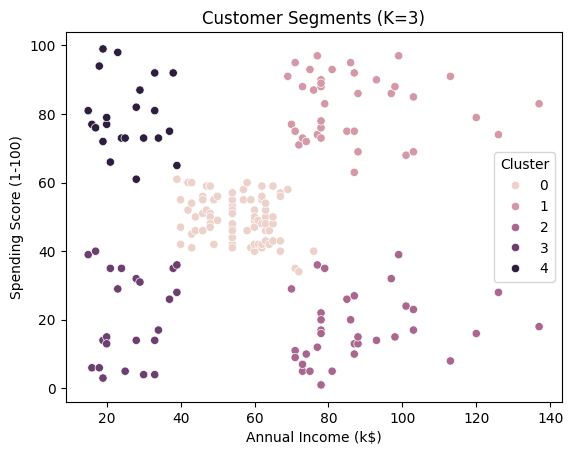

In [23]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto').fit(X_scaled)

customer_data_with_labels['Cluster'] = kmeans.labels_

sns.scatterplot(data=customer_data_with_labels, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.title('Customer Segments (K=3)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Businesses would be able to isolate instances better when there is a larger number of clusters.